In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Google-Playstore.csv')

In [ ]:
df

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21484,Benefici penitenziari,appinventor.ai_avvandreaterrinoni.beneficipeni...,Education,4.8,8.0,50+,50.0,65,True,0.0,...,https://www.studiolegaletgc.it,avvterrinoni@studiolegaletgc.it,"Jan 11, 2021","Apr 14, 2021",Everyone,NaN,False,False,False,2021-06-15 20:40:32
21485,FieldEquip,com.bursys.fe.in,Business,0.0,0.0,10+,10.0,18,True,0.0,...,http://www.fieldequip.com,contactus@bursys.com,"Aug 14, 2020","May 29, 2021",Everyone,http://www.bursys.com/privacy-policy,False,False,False,2021-06-15 20:40:32
21486,Kell Smith Fã-Clube,com.fanclub.kellsmith,Entertainment,3.8,17.0,"5,000+",5000.0,8814,True,0.0,...,NaN,fanclubappcontact+kellsmith@gmail.com,"Aug 6, 2018","Aug 06, 2018",Everyone,https://docs.google.com/document/d/e/2PACX-1vS...,True,False,False,2021-06-15 20:40:32
21487,KidsAbc,com.saahi.ehan.kidsabc,Education,0.0,0.0,100+,100.0,224,True,0.0,...,NaN,vadudmohd@gmail.com,"Aug 31, 2018","May 04, 2019",Everyone,https://sites.google.com/view/kidsabcappatplay...,True,False,False,2021-06-15 20:40:33


In [ ]:
df1 = df.drop(['App Id','Developer Id','Developer Website','Developer Email','Minimum Installs',
               'Privacy Policy','Scraped Time',],
               axis=1, inplace=False)

In [ ]:
df1.isnull().sum()

App Name              0
Category              0
Rating              186
Rating Count        186
Installs              1
Maximum Installs      0
Free                  0
Price                 0
Currency              1
Size                  0
Minimum Android      62
Released            609
Last Updated          1
Content Rating        1
Ad Supported          1
In App Purchases      1
Editors Choice        1
dtype: int64

In [ ]:
# number of apps in each category
cat_df = pd.DataFrame(df1['Category'].value_counts().head()).reset_index()
cat_df

,index,Category
0,Education,2204
1,Music & Audio,1490
2,Business,1334
3,Tools,1307
4,Entertainment,1262


In [ ]:
# total number of categories
df1['Category'].nunique()

48

In [ ]:
# what percentage of apps are free
free_df = df1['Free'].value_counts()
free_df

True     21048
False      441
Name: Free, dtype: int64

In [ ]:
# number of apps in racing category
len(df1[df1['Category'] == 'Racing'])

106

In [ ]:
# time between released date and updation of apps
pd.to_datetime(df1['Last Updated'][2]) - pd.to_datetime(df1['Released'][2])

Timedelta('10 days 00:00:00')

In [ ]:
df2 = df1.copy()
df2.dropna(inplace=True)

In [ ]:
df2.shape

(20816, 17)

In [ ]:
# number of app installations and their categories
df2['Installs'].unique()

array(['10+', '5,000+', '50+', '100+', '1,000+', '500+', '50,000+',
       '10,000+', '1+', '500,000+', '100,000+', '5+', '10,000,000+',
       '1,000,000+', '5,000,000+', '0+', '100,000,000+', '50,000,000+',
       '1,000,000,000+'], dtype=object)

In [ ]:
df3 = df2['Installs'].value_counts().head(15)
df3

100+           4030
1,000+         3575
10+            2659
10,000+        2362
500+           1677
50+            1555
5,000+         1332
100,000+        999
50,000+         668
5+              639
1+              578
1,000,000+      294
500,000+        234
0+               94
10,000,000+      56
Name: Installs, dtype: int64

In [ ]:
df2[df2['Installs'] == '10,000,000+'][['App Name','Maximum Installs']]


,App Name,Maximum Installs
92,Car Games Revival: Car Racing Games for Kids,30052692
561,Web Browser & Fast Explorer,13629503
631,Piano Melody,13882293
747,Crazy Kick!,31738431
764,Bridge Constructor Playground FREE,11050132
885,"Komoot — Cycling, Hiking & Mountain Biking Maps",11930352
1500,Girly Lock Screen Wallpaper with Quotes,12805205
1524,Kids Airport Adventure,16153296
1563,Opus Player - WhatsApp Audio Search and Organize,12408547
2594,AppLock Lite,10399530


In [ ]:
df2[df2['Installs'] == '5,000,000+'][['App Name','Maximum Installs']]


,App Name,Maximum Installs
291,Taxsee Driver,6864573
728,Glitter Color: Adult Coloring Book By Number P...,8532920
914,Love Photo Frame,5111138
942,Fabulous - Angela's Wedding Disaster 👰 🤵,6120263
948,Gandr — A photo collage maker without limits,7637954
1301,Mobile Number Tracker & Locator,8254825
1325,Math Duel: 2 Player Math Game,6062081
2721,lock screen passcode,7528994
2753,Pink Love Keyboard,5107534
2771,Scout GPS Navigation & Meet Up,8884206


In [ ]:
# How many apps per rating given to apps
df4 = df2.groupby('Rating')['App Name'].count().sort_values(ascending=False).head(10)
df4

Rating
0.0    9602
5.0     886
4.2     778
4.4     761
4.3     761
4.6     745
4.5     737
4.1     635
4.0     623
4.8     594
Name: App Name, dtype: int64

In [ ]:
# Median rating and rating count of each app given per category
df2.groupby('Category')['Rating','Rating Count'].median().sort_values(by='Rating Count', ascending=False).head(10)

<ipython-input-19-c89914b3d5ff>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2.groupby('Category')['Rating','Rating Count'].median().sort_values(by='Rating Count', ascending=False).head(10)


,Rating,Rating Count
Category,,
Casino,4.00,116.0
Simulation,3.90,106.0
Role Playing,4.00,69.5
Racing,3.80,50.0
Video Players & Editors,3.70,40.0
Card,3.95,26.5
Dating,3.50,24.5
Weather,3.90,21.0
Board,3.95,17.0


In [ ]:
df2.groupby('Category')['Rating Count'].sum().sort_values(ascending= False).head(10).reset_index()

,Category,Rating Count
0,Racing,3602010.0
1,Tools,2724858.0
2,Productivity,2085755.0
3,Action,2038828.0
4,Finance,1772626.0
5,Sports,1590211.0
6,Word,1468119.0
7,Video Players & Editors,1434695.0
8,Education,1388446.0
9,Arcade,1350427.0


In [ ]:
# Top 5 size of apps
df5 = df2['Size'].value_counts().head()
df5

11M                   563
12M                   475
14M                   456
Varies with device    452
13M                   425
Name: Size, dtype: int64

In [ ]:
# What are the number of apps in content rating?
rating_df = pd.DataFrame(df2['Content Rating'].value_counts()).reset_index()
rating_df['Total Percentage'] = rating_df['Content Rating'].map(lambda x: round((x / rating_df['Content Rating'].sum())*100,2))
rating_df

,index,Content Rating,Total Percentage
0,Everyone,18212,87.49
1,Teen,1751,8.41
2,Mature 17+,552,2.65
3,Everyone 10+,300,1.44
4,Adults only 18+,1,0.00


In [ ]:
# What about Ad supported or not and in app purchase status?
df2['Ad Supported'].value_counts()

True     10457
False    10359
Name: Ad Supported, dtype: int64

In [ ]:
df2['In App Purchases'].value_counts()

False    19126
True      1690
Name: In App Purchases, dtype: int64

<Figure size 1000x600 with 0 Axes>

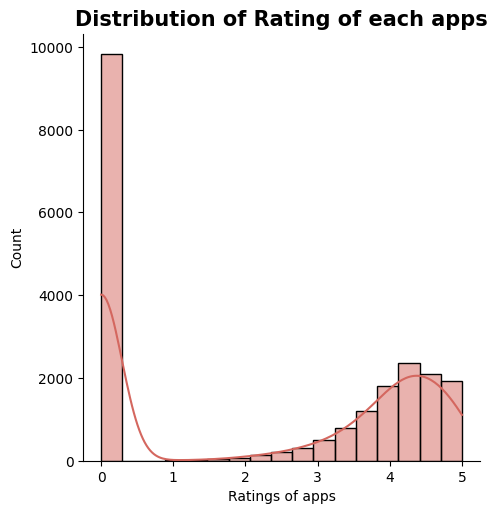

In [ ]:
# PLOTTING - What is the distribution of Rating of app
plt.figure(figsize=(10,6),facecolor='#dbd7d7')
sns.displot(x=df1['Rating'],kde=True, color='#d4675f')
plt.title("Distribution of Rating of each apps", fontsize=15, fontweight='bold')
plt.xlabel("Ratings of apps")
plt.show()

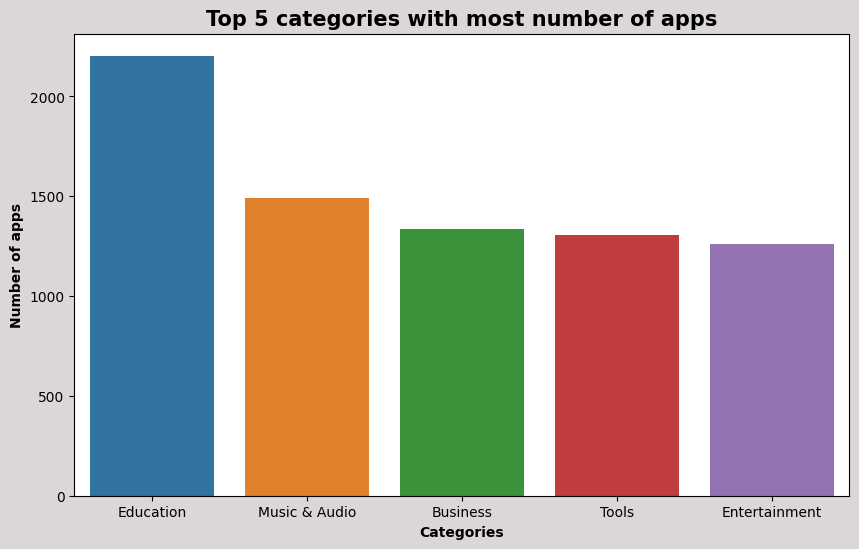

In [ ]:
# PLOTTING - the number of apps are there in each category
plt.figure(figsize=(10,6), facecolor='#dbd7d7')
sns.barplot(x='index', y='Category', data=cat_df)
plt.title("Top 5 categories with most number of apps", fontsize=15, fontweight='bold')
plt.xlabel("Categories", fontweight='bold')
plt.ylabel("Number of apps", fontweight='bold')
plt.show()

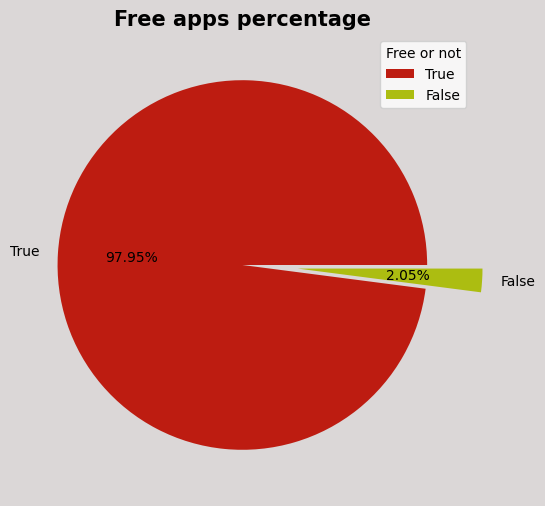

In [ ]:
# pie chart of percentage of free apps
plt.figure(figsize=(10,6), facecolor='#dbd7d7')
plt.pie(free_df.values,
        colors=['#bd1c11','#acbd11'],
        labels=free_df.index,
        autopct = '%1.2f%%',
        explode=[0.0, 0.3])
plt.legend(title='Free or not')
plt.title("Free apps percentage", fontsize=15, fontweight='bold')
plt.show()

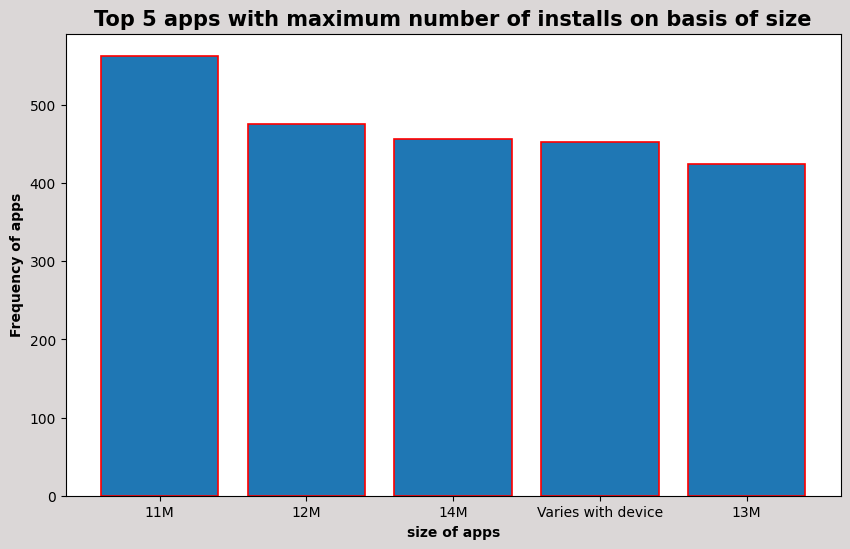

In [ ]:
# PLOTTING - Top 5 size of apps
plt.figure(figsize=(10,6), facecolor='#dbd7d7')
plt.bar(df5.index, df5.values, edgecolor= 'r', linewidth=1.2)
plt.title("Top 5 apps with maximum number of installs on basis of size", fontsize=15, fontweight='bold')
plt.xlabel("size of apps",  fontweight='bold')
plt.ylabel('Frequency of apps', fontweight='bold')
plt.show()